*Creating a MOC from a set of coordinates*

In [1]:
%matplotlib inline

In [2]:
from mocpy import MOC

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle

Let's load a VizieR catalog

In [3]:
from astroquery.vizier import Vizier

viz = Vizier(columns=["*", "_RAJ2000", "_DEJ2000"])
viz.ROW_LIMIT = -1
table = viz.get_catalogs("I/293/npm2cros")[0]

print(table)

 _RAJ2000   _DEJ2000    NPM2   KLA  RAJ2000   ...  IQ  IN r_Star  mag  tyc
   deg        deg                   'h:m:s'   ...                 mag     
---------- ---------- -------- --- ---------- ... --- --- ------ ----- ---
339.638333  83.166667 +83.0016 HPM 22 38 33.2 ...   0   0    811 14.20    
339.638333  83.166667 +83.0016 HPM 22 38 33.2 ...   0   0    813 14.20    
349.530833  83.010556 +83.0022 VAR 23 18 07.4 ...   0   0    843    --   T
349.530833  83.010556 +83.0022 SRA 23 18 07.4 ...   0   0      1  9.60   T
323.854167  82.997222 +82.0030 UBV 21 35 25.0 ...   0   0      5 10.08   T
332.107917  82.747500 +82.0055  WD 22 08 25.9 ...   0   0   1012 16.00    
332.933750  82.607778 +82.0059 HPM 22 11 44.1 ...   0   0    811 16.70    
335.088750  82.970833 +82.0065 HPM 22 20 21.3 ...   0   0    811 11.00   T
337.119167  82.763889 +82.0074 UBV 22 28 28.6 ...   0   0      5 10.42   T
337.274583  82.662222 +82.0075 HPM 22 29 05.9 ...   1   0    811 17.40    
       ...        ...    

Let's create a MOC from the coordinates of this table

In [4]:
# A function creating all the matplotlib context for plotting a MOC with its perimeter
def plot(moc, title=""):
    import matplotlib.pyplot as plt
    from mocpy import WCS

    fig = plt.figure(figsize=(15, 10))

    with WCS(
        fig,
        fov=330 * u.deg,
        center=SkyCoord(0, 0, unit="deg", frame="galactic"),
        coordsys="galactic",
        rotation=Angle(0, u.degree),
        projection="AIT",
    ) as wcs:
        ax = fig.add_subplot(1, 1, 1, projection=wcs)

        moc.fill(
            ax=ax,
            wcs=wcs,
            edgecolor="r",
            facecolor="r",
            linewidth=1.0,
            fill=True,
            alpha=0.5,
        )
        moc.border(ax=ax, wcs=wcs, color="black", alpha=0.5)

    plt.xlabel("ra")
    plt.ylabel("dec")
    if title:
        plt.title(title)
    plt.grid(color="black", linestyle="dotted")
    plt.show()
    plt.close()

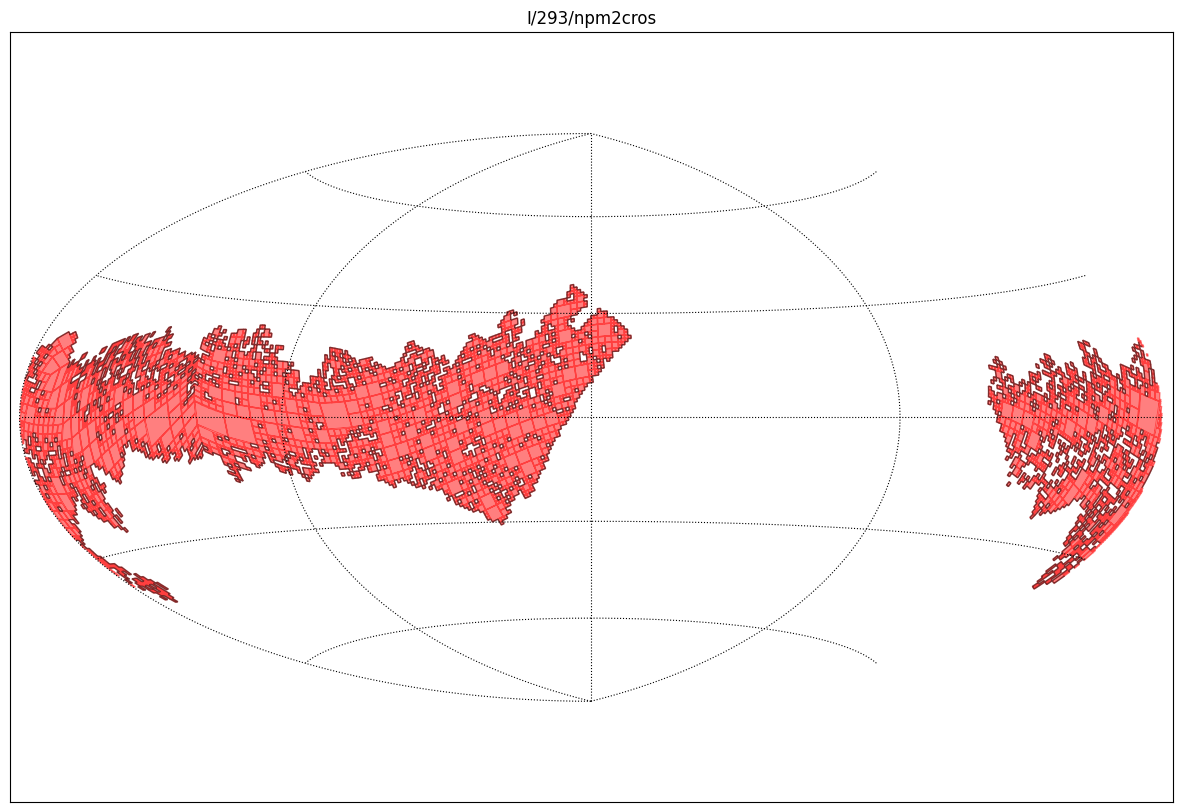

In [5]:
moc = MOC.from_lonlat(table["_RAJ2000"].T * u.deg, table["_DEJ2000"].T * u.deg, 6)
plot(moc=moc, title="I/293/npm2cros")